In [1]:
from os.path import join
import numpy as np
from numpy.linalg import svd, inv, pinv

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

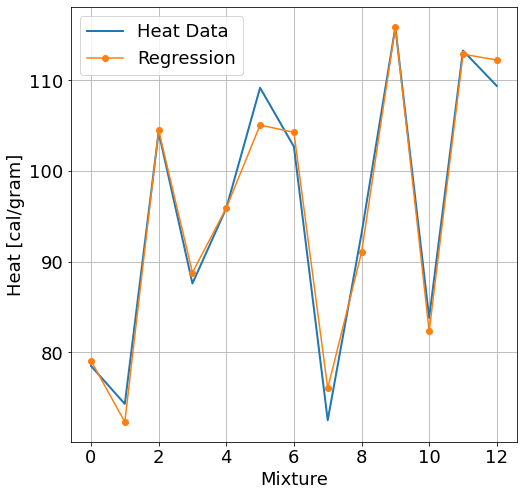

In [2]:
# Figure 1.10

# Load dataset
A = np.loadtxt(join('..', 'DATA', 'hald_ingredients.csv'), delimiter=',')
b = np.loadtxt(join('..', 'DATA', 'hald_heat.csv'), delimiter=',')

# Solve Ax=b using SVD
U, S, VT = svd(A, full_matrices=False)
Σ = np.diag(S)
x = VT.T @ inv(Σ) @ U.T @ b

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(b, linewidth=2, label='Heat Data') # True relationship
ax.plot(A @ x,  '-o', linewidth=1.5,  markersize=6, label='Regression')
ax.legend()
ax.set_xlabel('Mixture')
ax.set_ylabel('Heat [cal/gram]')
ax.grid(True);

In [3]:
# Alternative Methods:

# The first alternative is specific to Matlab:
# x = regress(b, A)

# Alternative 2:
x = pinv(A) @ b